In [6]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [8]:
np.random.seed(12)

asset = np.random.normal(0.0010, 0.018, 252)
market = np.random.normal(0.0006, 0.012, 252)
smb = np.random.normal(0.0002, 0.008, 252)
hml = np.random.normal(0.00015, 0.007, 252)

Rf = 0.0001



returns = pd.DataFrame({
    "asset" : asset,
    "market" : market,
    "smb" : smb,
    "hml": hml
})

excess_asset = asset - Rf
excess_market = market - Rf

X = np.column_stack((excess_market, smb, hml))
y = np.array(excess_asset)

model = LinearRegression().fit(X,y)

alpha = model.intercept_
beta = model.coef_[0]
s = model.coef_[1]
h = model.coef_[2]
R2_score = model.score(X,y)

print(f"Alpha: {alpha}")
print(f"Beta: {beta}")
print(f"SMB Loading: {s}")
print(f"HML Loading: {h}")
print(f"R² Score: {R2_score}")


Alpha: -0.0015610238438782745
Beta: -0.13125525878869637
SMB Loading: -0.25782259617781855
HML Loading: -0.29578855325195896
R² Score: 0.03413233799053328


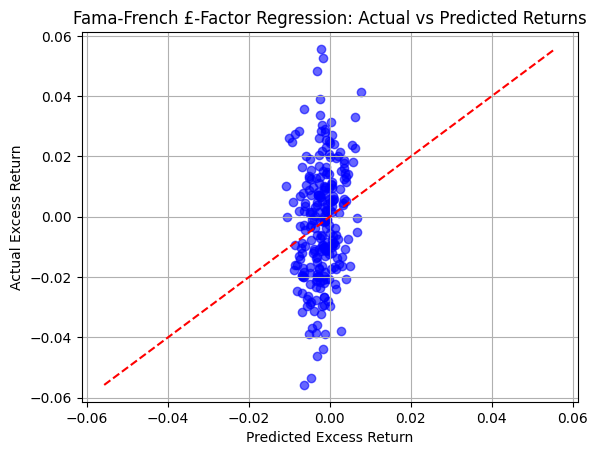

In [10]:
predicted = model.predict(X)

plt.scatter(predicted, excess_asset, color="blue", alpha=0.6, label="Data points")

min_val = min(min(predicted), min(excess_asset))
max_val = max(max(predicted), max(excess_asset))

plt.plot([min_val, max_val], [min_val, max_val], linestyle='--', color='red')

plt.title("Fama-French £-Factor Regression: Actual vs Predicted Returns")
plt.xlabel("Predicted Excess Return")
plt.ylabel("Actual Excess Return")
plt.grid(True)

plt.show()

* Points far from diagonal → low explanatory power

* Model doesn’t predict returns well

* Expected for simulated data with no factor structure

* Real market factors would produce tighter clustering

In [14]:
avg_market_premium = np.mean(excess_market)

avg_smb = np.mean(smb)

avg_hml = np.mean(hml)

market_contrib = beta * avg_market_premium
smb_contrib = s * avg_smb
hml_contrib = h * avg_hml
alpha_contrib = alpha

total_model_return = alpha_contrib + market_contrib + smb_contrib + hml_contrib

actual_asset_avg = np.mean(excess_asset)

print(f"Market Contribution: {market_contrib}")
print(f"SMB Contribution: {smb_contrib}")
print(f"HML Contribution: {hml_contrib}")
print(f"Alpha Contribution: {alpha_contrib}")
print(f"Total Predicted Return: {total_model_return}")
print(f"Actual Return: {actual_asset_avg}")

Market Contribution: -0.00010990138828826957
SMB Contribution: -7.857477565328373e-05
HML Contribution: -0.0002226978341366295
Alpha Contribution: -0.0015610238438782745
Total Predicted Return: -0.001972197841956457
Actual Return: -0.0019721978419564574


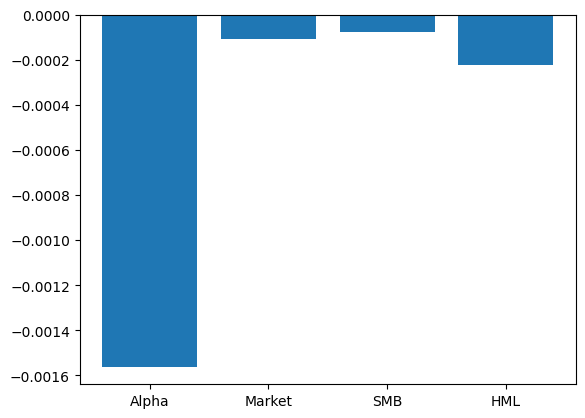

In [17]:
categories = ["Alpha", "Market", "SMB", "HML"]
values = [alpha, market_contrib, smb_contrib, hml_contrib]

plt.bar(categories, values)

plt.show()